#1. DTM 특성 이해 및 활용

- 언어모델 VS BOW
 - 언어 모델(Language Model): 단어 시퀀스에 확률을 할당(assign), 문장의 확률 예측
  - 통계 기반 / ANN 기반 등
  - GPT 나 Bert, Transformer 또한 인공 신경망 모델 기반


 -  BOW(bag of words): 전통적 방식
  - Bag of Words란 단어들의 순서는 전혀 고려하지 않고, 단어들의 출현 빈도(frequency)에만 집중하는 텍스트 데이터의 수치화
  - 쉽게 빠른 구축
  - 예상보다 문서의 특징을 잘 나타내어 전통적으로 여러분야에서 활용도가 높음
  - 문맥 의미(Semantic Context) 반영 문제
  - 희소 행렬 문제




In [1]:
import pandas as pd
df = pd.read_csv("news.csv")
df["articles"]

,articles
0,게티이미지뱅크 콩나물(사진)은 대두를 발아시켜 뿌리를 자라게 한 것이다. 동의보감에...
1,"사진 한 장 없이 떠난 일지 스님 불교 현실에 대한 질타 등 생전에 연재했던 글, ..."
2,이재익의 아재음악 열전전태관(왼쪽)과 김종진. <한겨레> 자료사진 2018년을 얼마...
3,서울대병원 제공서울대병원은 올해 1월부터 국내에서 독자적으로 개발한 인공지능 기술을...
4,ㆍ2.1㎓ 속도 ‘엑시노스 오토 V9’ㆍ2021년 생산 차량부터 탑재2021년 생산...
...,...
395,박정호 SK텔레콤 사장이 SK브로드밴드 사장을 겸직한 이후 첫 행보로 ‘옥수수 연합...
396,LG전자가 세계 최초 88인치 8K OLED TV를 내놓는다. 인공지능(AI) 기술...
397,"게임은 사회악 아닌 건전한 놀이문화(지디넷코리아=이도원 기자)""게임산업 전체의 발전..."
398,10여년 만에 매출예상치 하향…주가도 폭락(지디넷코리아=김익현 기자)최근 10년 여...


In [2]:
!pip install konlpy

from konlpy.tag import Okt
okt = Okt() #Kkma, Hannanum....
okt.nouns( df["articles"][0] )  #수집된 첫번째 기사에 대한 명사

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 22.1 MB/s eta 0:00:00


['게티',
 '이미지',
 '뱅크',
 '콩나물',
 '사진',
 '은',
 '대두',
 '발아',
 '뿌리',
 '것',
 '동의보감',
 '콩나물',
 '온',
 '몸',
 '근육',
 '뼈',
 '때',
 '도움',
 '제반',
 '염증',
 '억제',
 '효과',
 '콩나물',
 '식물',
 '단백질',
 '아스파라긴산',
 '은',
 '프랑',
 '과학자',
 '아스파라거스',
 '발견',
 '이름',
 '아스파라긴산',
 '암모니아',
 '대사',
 '촉진',
 '독소',
 '흡수',
 '혈액',
 '통해',
 '제거',
 '간',
 '건강',
 '도움',
 '이',
 '때문',
 '숙취',
 '해소',
 '효과',
 '또',
 '콩팥',
 '기능',
 '요산',
 '배설',
 '촉진',
 '시킴',
 '동시',
 '신경통',
 '류머티즘',
 '효과',
 '콩나물',
 '대두',
 '상태',
 '일',
 '때',
 '비타민',
 '발아',
 '과정',
 '합성',
 '비타민',
 '비타민',
 '피부',
 '면역',
 '콩나물',
 '조리',
 '과정',
 '비타민',
 '파괴',
 '때문',
 '조리',
 '섭취',
 '게',
 '정명',
 '진',
 '의학',
 '전문',
 '기자',
 '정명',
 '진',
 '기자',
 '세상',
 '모든',
 '골',
 '이야기',
 '파스',
 '보이',
 '연예',
 '뉴스',
 '스타',
 '저작권',
 '파이낸셜뉴스',
 '무단',
 '재',
 '재',
 '배포',
 '금지']

In [3]:
def tokenizer(text):  #함수를 만드는 부분
    # 입력 인자로 들어온 text 를 형태소 단어로 토큰화 하여 list 객체 반환
    tokens_ko = okt.nouns(text) #nouns를 morphs로 바꾸면 명사외에도...
    return tokens_ko

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vect = TfidfVectorizer(tokenizer=tokenizer,
                          #stop_words 단어를 제거
                          stop_words=['건','악','최', '초','총','탈', '폭'],
                          #단어들이 최소 전체의 10% 문서에서 나오는 것만 DTM에 사용
                          min_df=0.1)
dtm = tf_vect.fit_transform( df.articles )
dtm

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<400x364 sparse matrix of type '<class 'numpy.float64'>'
	with 29578 stored elements in Compressed Sparse Row format>

In [5]:
tf_vect.vocabulary_
tf_vect.get_feature_names_out()

array(['가격', '가능성', '가운데', '가장', '가지', '가치', '각각', '간', '감소', '강조', '개',
       '개발', '개선', '개인', '거나', '건강', '것', '게', '게임', '결과', '결정', '경우',
       '경쟁', '경쟁력', '경제', '경험', '계속', '계획', '고', '고려', '곳', '공간', '공개',
       '과', '과거', '과정', '관계', '관계자', '관련', '관리', '관심', '관측', '교수', '구독',
       '국가', '국내', '국제', '규모', '규제', '그', '그동안', '글로벌', '금지', '기간', '기능',
       '기도', '기록', '기반', '기사', '기술', '기업', '기자', '기존', '기준', '길', '김',
       '나', '날', '내', '내용', '네이버', '년', '누구', '눈', '뉴스', '다른', '다만', '다시',
       '다음', '단계', '달', '당시', '대부분', '대비', '대상', '대표', '대한', '대해', '더',
       '더욱', '데', '데이터', '도', '도움', '동시', '동안', '동영상', '두', '뒤', '등',
       '등장', '때', '때문', '또', '또한', '뜻', '라며', '로', '를', '마련', '마지막', '만',
       '만큼', '만화', '말', '매우', '매출', '먼저', '메인', '며', '면서', '명', '명의',
       '모델', '모두', '모든', '모바일', '모습', '목표', '못', '무단', '무엇', '문제', '문화',
       '미국', '미디어', '미래', '및', '바', '바로', '바로가기', '반응', '발생', '발표', '방법',
       '방송', '방식', '배', '배경', '배포', '번', '법인', '변화', '병원',

In [6]:
df2 = pd.DataFrame(dtm.todense(), columns = tf_vect.get_feature_names_out())
df2

,가격,가능성,가운데,가장,가지,가치,각각,간,감소,강조,...,확보,확인,환경,환자,활동,활용,회사,효과,후,힘
0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.151087,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.477219,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.0,0.099479,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.081761,0.160110,0.000000,0.000000,0.000000,0.118364,0.155893
3,0.000000,0.037865,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.093729,0.045887,0.169115,0.036483,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.000000,0.000000,0.043998,0.0,0.000000,0.00000,0.050462,0.044950,0.000000,0.000000,...,0.0,0.0,0.043543,0.000000,0.000000,0.046494,0.000000,0.000000,0.000000,0.000000
396,0.000000,0.000000,0.000000,0.0,0.000000,0.05145,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.047337,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
397,0.000000,0.000000,0.000000,0.0,0.035923,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.037022,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
398,0.053786,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.056783,0.100149,...,0.0,0.0,0.095950,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### 연습

In [7]:
!pip install konlpy #형태소분석기를 사용하기 위해 외부기능 설치

import pandas as pd #자료를 읽기 위해 불러옴
from konlpy.tag import Okt #형태소분석을 하기 위해 불러옴
from tqdm import tqdm #진행상황 확인
from sklearn.cluster import KMeans #Kmeans 군집기법을 사용하기 위해 불러옴

In [8]:
data = pd.read_csv("train_df.csv",encoding = 'cp949')
data.columns

Index(['IDX', '발화자', '발화문', '인텐트', '상담번호', '상담내순번'], dtype='object')

- 주어진 데이터를 읽어서, 발화문에서 명사를 추출하여 DTM
- 같은 상담번호의 발화문을 하나의 텍스트로 병합 후 명사 추출하여 DTM
- DTM을 만든 후 군집 분석

In [9]:
from konlpy.tag import Okt
okt = Okt() #open korean text 형태소분석기
def token(text):
    tokens_ko = okt.nouns(text) #명사만 추출
    return tokens_ko

stopwords = ['을',
             '부터', '까지' '적', '의','가','이','은',
             '들','는','좀','잘','걍','과','도','를','으로',
             '자','에','와','한','하다', '점', '나']


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer=token,
                             stop_words=stopwords,
                             min_df=5 )
tfidf_vect.fit_transform(data['발화문'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['지적'] not in stop_words.
  warnings.warn(


<29360x1981 sparse matrix of type '<class 'numpy.float64'>'
	with 199455 stored elements in Compressed Sparse Row format>

In [11]:
data[0:2].발화문.values.tolist()

['혹시 플라워 스마트 톡 케이스 블루로 바꿀 수 있나요?', '현재 배송 중으로 교환이 어렵습니다.']

In [12]:
def func1(x):
  x2 = x.values.tolist()
  tmp = ""
  for i in x2:
    tmp = tmp+i+" "
  return tmp

In [13]:
data.groupby("상담번호")["발화문"].head()
data.groupby("상담번호")["발화문"].apply(func1)

,발화문
상담번호,
111,아이패드 반품하려는데 반품신청은 어디서 하나요? 공식홈페이지에서 반품신청 해주시면 ...
112,아이패드 반품신청 어디서 해요? 공식홈페이지에서 신청해주세요.
113,아이패드 반품신청 어디서 하는지 알 수 있을까요? 공식 홈페이지에서 해주시면 됩니다.
114,아이패드 반품은 어디서 신청하죠? 공식 홈페이지에서 반품신청 진행해주시면 돼요.
115,아이패드 반품 어디서 하는지 알려주세요. 공식 홈페이지에서 해주시면 돼요.
...,...
422167,그것도 모르고 제가 문제가 있는 줄 알았습니다 교환 요청해야 하나요? 상품 불량으로...
422204,온도조절기 때문에 반품 신청했는데 혹시 온도조절기만 교환받을 수는 없는지요? 반품건...
422216,15일에 가져갔어요 정확히 언제 환불 처리되나요? 사이트에 반품 접수 바랍니다.


In [14]:
data1 = data.groupby("상담번호")["발화문"].apply(func1).reset_index().set_index("상담번호")
data1.head()#.iloc[10,0]

,발화문
상담번호,
111,아이패드 반품하려는데 반품신청은 어디서 하나요? 공식홈페이지에서 반품신청 해주시면 ...
112,아이패드 반품신청 어디서 해요? 공식홈페이지에서 신청해주세요.
113,아이패드 반품신청 어디서 하는지 알 수 있을까요? 공식 홈페이지에서 해주시면 됩니다.
114,아이패드 반품은 어디서 신청하죠? 공식 홈페이지에서 반품신청 진행해주시면 돼요.
115,아이패드 반품 어디서 하는지 알려주세요. 공식 홈페이지에서 해주시면 돼요.


In [15]:
data1["발화문"] = data1.발화문.replace("[^\s&^가-힣]"," ", regex=True)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect2 = TfidfVectorizer(tokenizer=token,
                             stop_words=stopwords,
                             min_df=5 )
tfidf_vect2.fit_transform(data1['발화문'])


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['지적'] not in stop_words.
  warnings.warn(


<14639x1951 sparse matrix of type '<class 'numpy.float64'>'
	with 184256 stored elements in Compressed Sparse Row format>

#2. 자연어처리와 머신러닝1 : 분류

- 분류 모형

In [17]:
from sklearn.datasets import load_digits
mnist = load_digits()
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [18]:
from sklearn.datasets import load_digits
mnist = load_digits()
mnist.keys()

#1. 전처리
X = mnist.data
y = mnist.target
X.shape
y.shape

(1797,)

In [19]:
import pandas as pd
pd.DataFrame(X).isnull().mean()
X_scaled = X/255

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X_scaled, y, test_size=0.2)


In [20]:
#1. DT
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier().fit(X_train, y_train)
pred1 = model1.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report( pred1, y_test))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94        34
           1       0.79      0.79      0.79        39
           2       0.78      0.78      0.78        36
           3       0.82      0.68      0.75        41
           4       0.85      0.81      0.83        42
           5       0.84      0.84      0.84        31
           6       0.89      0.92      0.90        36
           7       0.79      0.89      0.84        38
           8       0.71      0.74      0.73        27
           9       0.83      0.83      0.83        36

    accuracy                           0.82       360
   macro avg       0.82      0.83      0.82       360
weighted avg       0.83      0.82      0.82       360



- 여러 분류모형 비교

In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import numpy as np

#NB
clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)
print('NB', np.mean(predicted == y_test))

#DT
dt1 = DecisionTreeClassifier().fit(X_train, y_train)
pred = dt1.predict( X_test)
print('DT', np.mean( pred == y_test ))

#RF
rf = RandomForestClassifier(n_estimators=300, random_state=42).fit(X_train, y_train)
predicted = rf.predict(X_test)
print('RF', np.mean( predicted == y_test ))

#KNN
knn = KNeighborsClassifier().fit(X_train, y_train)  #k=5
predicted = knn.predict(X_test)
print('KNN', np.mean( predicted == y_test ))

#SVM
svm = SVC().fit(X_train, y_train)
predicted = svm.predict(X_test)
print('SVM', np.mean( predicted == y_test ))

#ANN
mlp = MLPClassifier(hidden_layer_sizes=(24,12,6)).fit(X_train,y_train)
predictions = mlp.predict(X_test)
print('ANN',np.mean( predictions == y_test ))

NB 0.8972222222222223
DT 0.8277777777777777
RF 0.9777777777777777
KNN 0.9861111111111112
SVM 0.9833333333333333
ANN 0.7916666666666666


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [22]:
from sklearn import model_selection
from sklearn import metrics

param_grid = {
    "max_depth":[1,3,5,7,9]
}
#declaring GridSearchCV model
grid1 = model_selection.GridSearchCV(
    estimator = model1, #모형
    param_grid = param_grid,  #
    scoring = 'accuracy', #정분류율
    verbose = 10,
    n_jobs = 1,
    cv = 5      #k-fold CV, k값.
)
#fitting values to the gridsearchcv model
grid1.fit(X_train,y_train)

#printing the best possible values to enhance accuracy
print(grid1.best_params_)
print(grid1.best_estimator_)
#printing the best score
print(grid1.best_score_)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5; 1/5] START max_depth=1.................................................
[CV 1/5; 1/5] END ..................max_depth=1;, score=0.198 total time=   0.0s
[CV 2/5; 1/5] START max_depth=1.................................................
[CV 2/5; 1/5] END ..................max_depth=1;, score=0.201 total time=   0.0s
[CV 3/5; 1/5] START max_depth=1.................................................
[CV 3/5; 1/5] END ..................max_depth=1;, score=0.202 total time=   0.0s
[CV 4/5; 1/5] START max_depth=1.................................................
[CV 4/5; 1/5] END ..................max_depth=1;, score=0.199 total time=   0.0s
[CV 5/5; 1/5] START max_depth=1.................................................
[CV 5/5; 1/5] END ..................max_depth=1;, score=0.199 total time=   0.0s
[CV 1/5; 2/5] START max_depth=3.................................................
[CV 1/5; 2/5] END ..................max_depth=3;,

- 문헌 분류

In [23]:
!unzip news_small.zip
#!unzip news.zip

Archive:  news_small.zip
  inflating: 103/103_1.txt           
  inflating: 103/103_10.txt          
  inflating: 103/103_100.txt         
  inflating: 103/103_101.txt         
  inflating: 103/103_102.txt         
  inflating: 103/103_103.txt         
  inflating: 103/103_104.txt         
  inflating: 103/103_105.txt         
  inflating: 103/103_106.txt         
  inflating: 103/103_107.txt         
  inflating: 103/103_108.txt         
  inflating: 103/103_109.txt         
  inflating: 103/103_11.txt          
  inflating: 103/103_110.txt         
  inflating: 103/103_111.txt         
  inflating: 103/103_112.txt         
  inflating: 103/103_113.txt         
  inflating: 103/103_114.txt         
  inflating: 103/103_115.txt         
  inflating: 103/103_116.txt         
  inflating: 103/103_117.txt         
  inflating: 103/103_118.txt         
  inflating: 103/103_119.txt         
  inflating: 103/103_12.txt          
  inflating: 103/103_120.txt         
  inflating: 103/103_121.

In [24]:
import os
import pandas as pd

files1 = os.listdir('103')   #압축이 풀린 103폴더의 파일들을 읽음
files2 = os.listdir('105')   #압축이 풀린 105폴더의 파일들을 읽음


In [25]:
y = []
x = []

#txt파일을 읽어서 파일 내용을 x라는 리스트에 추가
def add_file(path):
    with open(path, "r", encoding="utf-8") as f:
        s = f.read()
        x.append(s)

In [26]:
#반복문, 똑같은 작업을 여러 대상에 적용
for f in files1:  #파일갯수만큼 반복
     add_file("103/"+f) #103폴더 신문기사가 X에 추가
     y.append(0)#103폴더 신문기사만큼 y에 0값을 추가, 0은 103을 나타내는 범주

for f in files2:
     add_file("105/"+f)
     y.append(1)  #105를 나타내는 범주 1

In [27]:
len(y)

400

In [28]:
x[0]

"이번 남쪽여행의 마지막 지점은 통영이었다. 서울에서 KTX로 여수로 이동해, 역전에서 렌터카를 받고, 여수 향일암-순천 선암사–남해 보리암을 보고 그 옆 동네 통영에 도착한 것이다. 바다, 섬, 높은 산, 암자, 항구, 시장, 억센 현지 말투, 그리고 충무공 이순신…. 남해안 동쪽여행을 하며 매일 머릿속을 맴돈 단어들이었다. 통영 또한 마찬가지였다. 다른 점이 있다면, 이곳에는 유난히 걸출한 예술가들이 많이 태어났다는 점. 소설, 그림, 조각, 음악, 음식 등 통영은 물론 한국을 대표하는 인물들이 그들이다. 예인이 많다는 것은 이곳에 무언가 뜨거운 불덩어리가 있다는 뜻일까? 통영 항구, 산, 거리에서 마주친 보통 사람들에게서도 무언가 범상치 않은 열기가 느껴지곤 했다. 물론 기분 탓이겠지만. ▶맨 먼저 찾아간 곳 ‘봄날의 책방’ 출판사 ‘남해의 봄날’에서 운영하는 서점이다. 서울에서 직장생활 하던 사람이 남쪽 끝 통영에 내려와 출판사를 차리고 책을 내고 서점과 게스트하우스를 열었다. 대도시를 떠나는 사람들의 이야기가 더 이상 이슈가 되지 않는 지금, 이는 평범해 보이지만 사실 특별한 일이다. 막상 실천하려면 백만 가지의 번잡함이 발목을 붙잡기 때문이다. 남해의 봄날이 2012년 첫번째 출판물을 세상에 냈을 때, 그 일상적이면서도 문학적이며, 듣고 보니 누구나 쉽게 떠올릴 수 있는 어떤 풍경을 연상케 하는 출판사 이름에 무작정 응원을 보냈던 사람 중 하나로서의 그 출판사에서 운영하는 ‘봄날의 책방’을 서둘러 찾은 게 이상한 일은 아니다. 『작은 책방, 우리 책 쫌 팝니다!』(백창화 김병록), 『우리가 사랑한 빵집, 성심당』(김태훈), 『통영 예술 기행』(통영길문화연대), 『동전 하나로도 행복했던 구멍가게의 날들』(이미경), 『로컬의 미래』(헬레나 노르베리 호지), 『마녀체력』(이영미), 『할머니의 행복 레시피』(나카무라 유) 등은 읽었거나, 읽고 싶었으나 게으름을 부린 ‘남해의 봄날’의 책들이다. 개인적이고 매우 어줍잖은 느낌이지만, 남해의 봄날에서 펴낸 책들

In [29]:
df = pd.DataFrame( {'label':y, 'articles':x })

In [30]:
df.head()

,label,articles
0,0,"이번 남쪽여행의 마지막 지점은 통영이었다. 서울에서 KTX로 여수로 이동해, 역전에..."
1,0,동영상 뉴스\n\t\t\n\t\n\n\n\n\t\n\t한국인이 매운 음식을 못 먹으...
2,0,2년간 누적 등록 대수 890대(지디넷코리아=조재환 기자)테슬라 차량의 지난해 국내...
3,0,경제와 문화의 가교 한경[ 김희경 기자 ] 스위스 중부에 있는 할빌 마을에서 지난 ...
4,0,간송미술관[아시아경제 박병희 기자] 간송미술관이 5년 만에 다시 일반에 문을 연다....


2. 데이터 파티셔닝

In [31]:
print( df['label'].value_counts( ) )  #label 컬럼의 범주별 빈도
print( df.info() )

label
0    200
1    200
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     400 non-null    int64 
 1   articles  400 non-null    object
dtypes: int64(1), object(1)
memory usage: 6.4+ KB
None


In [33]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split( df, test_size=0.2)

In [34]:
train_df.shape

(320, 2)

3. 토크나이저 만들기 (명사만 추출)

In [32]:
!pip install konlpy
from konlpy.tag import Okt

morphs = Okt()
def token(text):
    tokens_ko = morphs.nouns(text)
    return tokens_ko


4. Tfidf로 DTM 만들기

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
tfidf_vect = TfidfVectorizer(tokenizer=token, min_df=10)
tfidf_vect.fit(train_df['articles'])  #train의 명사를 뽑은 것까지

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TfidfVectorizer(min_df=10, tokenizer=<function token at 0x7fe8cb60d900>)

In [36]:
tfidf_matrix_train = tfidf_vect.transform(train_df['articles'])
tfidf_matrix_test = tfidf_vect.transform(test_df['articles'])

5.  모델링

In [37]:
#RF 이용하여 감성 분석 Classification 수행.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#n_estimators: RF에 들어가는 tree의 개수
rf = RandomForestClassifier(random_state=0, n_estimators=1000)
rf.fit(tfidf_matrix_train , train_df['label']  )  #모델링
preds1 = rf.predict(tfidf_matrix_test) #테스트셋으로 감성예측
print('Accuracy: ',accuracy_score(test_df['label'],preds1))#정답율

Accuracy:  0.875


다른 모형과 비교

In [38]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

dt1 = tree.DecisionTreeClassifier()
dt1 = dt1.fit(tfidf_matrix_train , train_df['label'])
dt1.feature_importances_
preds2 = dt1.predict( tfidf_matrix_test )
print('Accuracy: ',accuracy_score(test_df['label'],preds2))#정답율

clf = MultinomialNB().fit(tfidf_matrix_train , train_df['label'])
preds3 = clf.predict(tfidf_matrix_test)
print('Accuracy: ',accuracy_score(test_df['label'],preds3))#정답율

lr_clf = LogisticRegression()
lr_clf.fit(tfidf_matrix_train , train_df['label'])
preds4 = lr_clf.predict(tfidf_matrix_test)
print('Accuracy: ',accuracy_score(test_df['label'],preds4))#정답율


Accuracy:  0.7625
Accuracy:  0.9375
Accuracy:  0.95


#3. 감성 분석의 활용

In [39]:
!pip install konlpy

In [40]:
!wget https://github.com/rickiepark/python-machine-learning-book-3rd-edition/raw/master/ch08/ratings_train.txt -O ratings_train.txt
!wget https://github.com/rickiepark/python-machine-learning-book-3rd-edition/raw/master/ch08/ratings_test.txt -O ratings_test.txt

--2024-09-05 14:39:02--  https://github.com/rickiepark/python-machine-learning-book-3rd-edition/raw/master/ch08/ratings_train.txt
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/python-machine-learning-book-3rd-edition/master/ch08/ratings_train.txt [following]
--2024-09-05 14:39:03--  https://raw.githubusercontent.com/rickiepark/python-machine-learning-book-3rd-edition/master/ch08/ratings_train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14628807 (14M) [text/plain]
Saving to: ‘ratings_train.txt’

ratings_train.txt   100%[===================>]  13.95M  --.-KB/s    in 0.1s    



In [41]:
from sklearn.model_selection import train_test_split
import pandas as pd

train_df = pd.read_csv('ratings_train.txt', sep='\t')#탭으로 값이 구분된 파일
print(train_df.shape)
train_df = train_df.iloc[0:1500, :]

train, test = train_test_split( train_df, test_size=0.2)
train_df.head(7)

(150000, 3)


,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0
6,7797314,원작의 긴장감을 제대로 살려내지못했다.,0


In [42]:
from konlpy.tag import Okt
twitter = Okt() #open korean text 형태소분석기
def tw_tokenizer(text):
    tokens_ko = twitter.morphs(text) #명사만 추출
    return tokens_ko

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer=tw_tokenizer, min_df=5 )
tfidf_vect.fit(train['document'])  #train의 명사를 뽑은 것까지
tfidf_matrix_train = tfidf_vect.transform(train['document'])
tfidf_matrix_test = tfidf_vect.transform(test['document'])


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [44]:
tfidf_vect.vocabulary_.keys()

dict_keys(['에서', '보기', '엔', '돈', '솔직히', 'ㅜㅜ', '별', '점', '10', '모든', '배우', '들', '이', '연기력', '굿', '~~', '최고', '의', '드라마', '원작', '을', '안', '사람', '은', '진짜', '보면서', '..', '특히', '에', '재밌음', '영화', '가', '좀', '소재', '도', '좋고', '몰입', '기', '대', '이상', '못', '한', '연기', '는', '다', '잘', '게', '대체', '무슨', '내용', '이야', ';;', '작가', '별로', '내', '임', '그냥', '기대', '하고', '하면', '답', '없다', '제일', '이영화', '점수', '0', ',', '하는게', '더', '감동', '적', '사랑', '감독', '하는', '말', '안되는', '생각', '...', '왜', '문제', '고', '처럼', '엉망', '이다', '.', '어느', '것', '하나', '를', '난', '거', 'ㅋㅋ', '이건', '정말', '캐스팅', '과', '하', '지', '않은', '!!', '으로', '만든', '야', '!', '대한', '스릴', '?', '아직도', '인생', '라', '그런', '건', '할', '뿐', '몇', '재밌게', '본', ';', '평점', '이딴', '한국', '라니', '너무', '없는', '스토리', '여자', '때', '웃음', '나옴', '냐', '이유', '알바', '저', '만', '-', '좋아하는', '정신', '세계', '이후', '마지막', '장면', '줄', '알', '아', '여기', '나', '했던', '에게', '이라고', '감정', '한다', '^^', '3', '4', '와', '기분', '그래도', '시간', '꽤', '결말', '가지', '수', '!!!', '없이', '공감', '있는', '인간', '성', '않는', '별루', '머', '이런', 'ㅋ', 

In [45]:
#RF 이용하여 감성 분석 Classification 수행.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#n_estimators: RF에 들어가는 tree의 개수
rf = RandomForestClassifier(random_state=0, n_estimators=500)
rf.fit(tfidf_matrix_train , train['label']  )  #모델링
preds1 = rf.predict(tfidf_matrix_test) #테스트셋으로 감성예측
print('Accuracy: ',accuracy_score(test['label'],preds1))#정답율

Accuracy:  0.6933333333333334


In [46]:
from sklearn.metrics import classification_report
print(classification_report(test['label'],preds1))

              precision    recall  f1-score   support

           0       0.66      0.79      0.72       150
           1       0.74      0.59      0.66       150

    accuracy                           0.69       300
   macro avg       0.70      0.69      0.69       300
weighted avg       0.70      0.69      0.69       300



#4. 자연어처리와 머신러닝2: 문헌유사도와 군집

 - 용어 빈도 탐색색

In [47]:
words = str( list( tfidf_vect.vocabulary_.keys() ) )
words

'[\'에서\', \'보기\', \'엔\', \'돈\', \'솔직히\', \'ㅜㅜ\', \'별\', \'점\', \'10\', \'모든\', \'배우\', \'들\', \'이\', \'연기력\', \'굿\', \'~~\', \'최고\', \'의\', \'드라마\', \'원작\', \'을\', \'안\', \'사람\', \'은\', \'진짜\', \'보면서\', \'..\', \'특히\', \'에\', \'재밌음\', \'영화\', \'가\', \'좀\', \'소재\', \'도\', \'좋고\', \'몰입\', \'기\', \'대\', \'이상\', \'못\', \'한\', \'연기\', \'는\', \'다\', \'잘\', \'게\', \'대체\', \'무슨\', \'내용\', \'이야\', \';;\', \'작가\', \'별로\', \'내\', \'임\', \'그냥\', \'기대\', \'하고\', \'하면\', \'답\', \'없다\', \'제일\', \'이영화\', \'점수\', \'0\', \',\', \'하는게\', \'더\', \'감동\', \'적\', \'사랑\', \'감독\', \'하는\', \'말\', \'안되는\', \'생각\', \'...\', \'왜\', \'문제\', \'고\', \'처럼\', \'엉망\', \'이다\', \'.\', \'어느\', \'것\', \'하나\', \'를\', \'난\', \'거\', \'ㅋㅋ\', \'이건\', \'정말\', \'캐스팅\', \'과\', \'하\', \'지\', \'않은\', \'!!\', \'으로\', \'만든\', \'야\', \'!\', \'대한\', \'스릴\', \'?\', \'아직도\', \'인생\', \'라\', \'그런\', \'건\', \'할\', \'뿐\', \'몇\', \'재밌게\', \'본\', \';\', \'평점\', \'이딴\', \'한국\', \'라니\', \'너무\', \'없는\', \'스토리\', \'여자\', \'때\', \'웃음\', \'나옴\', \'냐\'

 - colab에 폰트 파일을 업로드

In [48]:
!unzip malgun.zip

Archive:  malgun.zip
  inflating: malgun.ttf              


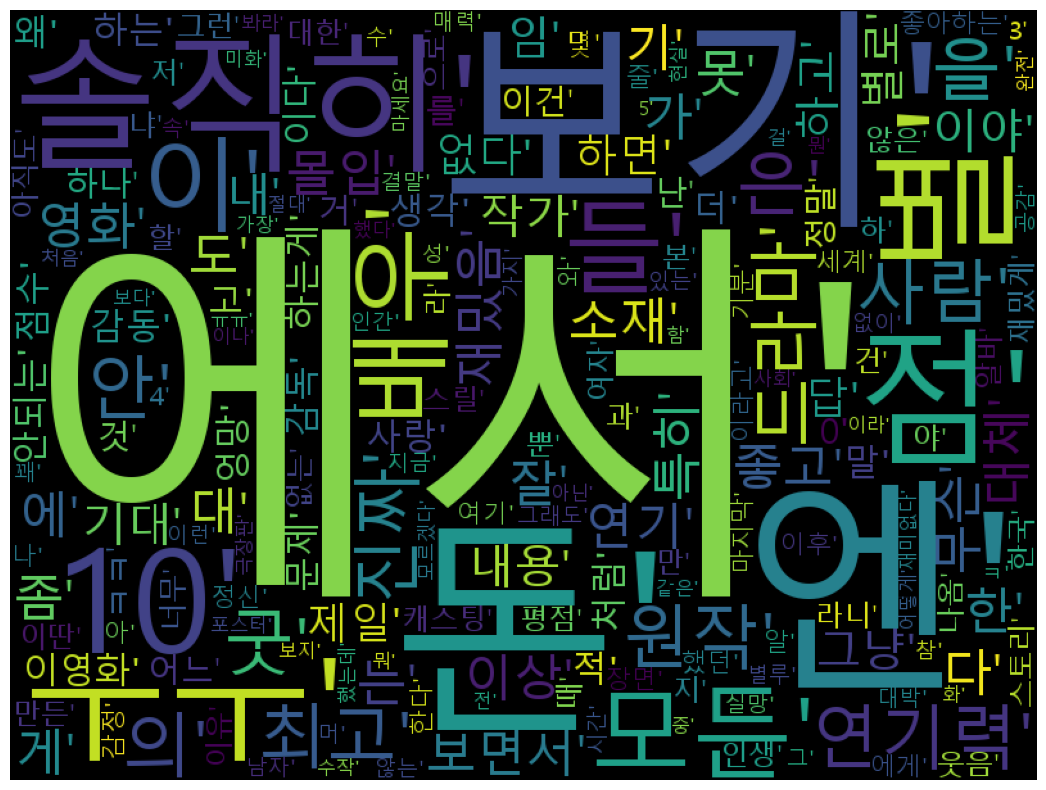

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#malgun.ttf를 업로드
wordcloud = WordCloud(font_path='malgun.ttf', background_color = "black", width = 800, height = 600).generate(words)
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


 - 유사도 계산해보기

In [50]:
tfidf_matrix_train

<1200x503 sparse matrix of type '<class 'numpy.float64'>'
	with 9307 stored elements in Compressed Sparse Row format>

In [51]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(tfidf_matrix_train[30,:] , tfidf_matrix_train[100,:]))
print(train_df.document[30])
print(train_df.document[100])

print(cosine_similarity(tfidf_matrix_train[30,:] , tfidf_matrix_train[30,:]))

[[0.0429937]]
엄포스의 위력을 다시 한번 깨닫게 해준 적.남 꽃검사님도 연기 정말 좋았어요! 완전 명품드라마!
신카이 마코토의 작화와,미유와 하나카나가 연기를 잘해줘서 더대박이였다.
[[1.]]


In [52]:
from sklearn.metrics.pairwise import euclidean_distances
euclidean_distances(tfidf_matrix_train[30,:] , tfidf_matrix_train[100,:])
#euclidean_distances(tfidf_matrix_train[100,:] , tfidf_matrix_train[100,:])
euclidean_distances(tfidf_matrix_train[30,:] , tfidf_matrix_train)

array([[1.41421356, 1.41421356, 1.32411233, ..., 1.41421356, 1.31360958,
        1.41421356]])

In [53]:
from sklearn.metrics import jaccard_score
import numpy as np

binary = np.array( [ [0,1,1,1,1], [1, 1, 1, 1,0]])

jaccard_score(binary[0,:] , binary[1,:])

0.6

 - 군집분석: k-means

In [54]:
from sklearn.cluster import KMeans

# 5개 집합으로 군집화 수행. 예제를 위해 동일한 클러스터링 결과 도출용 random_state=0
km_cluster = KMeans(n_clusters=4)
km_cluster.fit(tfidf_matrix_train)  #DTM을 입력으로 넣음

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [55]:
for i in range(3,15):
 print(i, KMeans(n_clusters=i).fit(tfidf_matrix_train).inertia_)

3 1095.9013558053325
4 1086.5253080954537
5 1077.9448227967962
6 1067.4475877503148
7 1059.8644131052138
8 1056.616950416114
9 1045.1122942347015
10 1038.0267422961367
11 1033.8898205201092
12 1028.0306266658863
13 1020.4234358000913
14 1015.5569180651871


In [56]:
cluster_label = km_cluster.labels_
cluster_label

cluster_centers = km_cluster.cluster_centers_#각 군집이 갖는 38개 단어 tfidf의 평균
#군집별 특성을 확인
cluster_centers

np.argmax( cluster_centers[1,:])  #군집별로 평균 tfidf가 가장 높은 단어를 확인


343

In [57]:
cluster_label = km_cluster.labels_
cluster_label #각각의 document가 몇번 군집인지를 알려주는 결과

cluster_centers = km_cluster.cluster_centers_#각 군집이 갖는 38개 단어 tfidf의 평균
#군집별 특성을 확인
np.argmax( cluster_centers[1,:])  #군집별로 평균 tfidf가 가장 높은 단어를 확인

#print(cluster_centers)
np.argmax( cluster_centers[1,:])  #군집별로 평균 tfidf가 가장 높은 단어를 확인


343

In [58]:
print( train_df.document[0])
print( train_df.document[2])

아 더빙.. 진짜 짜증나네요 목소리
너무재밓었다그래서보는것을추천한다


In [59]:
train['cluster_label'] = cluster_label
train.head()

,id,document,label,cluster_label
832,3674831,영화관에서 보기엔 돈아까웠다;;;;;....... 솔직히 재미없었다 ㅜㅜ,0,0
123,7469033,별점10점가자,1,0
1030,8626168,모든배우들이 연기력이 굿 ~~최고의드라마,1,1
1126,7505936,원작 소설을 안읽은 사람들은 진짜 보면서 답답합니다.. 특히 엔딩,0,0
320,9182989,2009년에 만들어진것치곤 재밌음 영화가 길어서 좀 다듬었으면 ..소재도 좋고 몰입...,1,0


In [60]:
from sklearn.cluster import KMeans

# 3개의 집합으로 군집화
km_cluster = KMeans(n_clusters=3) #군집의 갯수 지정
km_cluster.fit(tfidf_matrix_train)
cluster_label = km_cluster.labels_


# 소속 클러스터를 cluster_label 컬럼으로 할당하고 cluster_label 값으로 정렬
train['cluster_label'] = cluster_label
train.sort_values(by='cluster_label')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,id,document,label,cluster_label
518,9869002,조잡하고 유치한 저예산 3류 B급 영화다.. 스토리에 깊이감도 없고 전체적으로 루즈하다.,0,0
786,10155376,진짜 언제 90분이 지나갔는지 모를정도로 몰입해서보고 정말 너무 재미있게 봄... ...,1,0
1158,3576721,목포.. 붹,0,0
111,2304429,왕짜증.....아주 전개를 짬뽕으로 믹스했구나...음향만 무섭게하네..하아,0,0
1361,4675153,이런 영화를 볼 수 있어서 ... ㅠㅠ 이제 정말 아픔이 없었으면 좋겠는데 말이죠..,1,0
...,...,...,...,...
1079,8744028,잘 만들었다. 중국의 현실을 꾸밈없이 보여 주는 영화이다. 영화 내내 중국에 와 있...,1,2
969,3889736,본지 수OO이 지나도 아직도 생생함. 고양이 귀신의 복수가 진짜 무서웠지,1,2
381,9673595,진짜 어마어마한 여운을 주는 멜로 영화에요.ㅎ,1,2
1461,8454757,한편의 영화에 너무도 많은걸 하려구 한거 같은데 결국 이것도 저것도 아닌 영화가 되...,0,2


In [61]:
cluster_centers = km_cluster.cluster_centers_
print('cluster_centers shape :',cluster_centers.shape)
print(cluster_centers)

cluster_centers shape : (3, 503)
[[0.00977513 0.01043814 0.         ... 0.00454117 0.         0.        ]
 [0.02078591 0.01264756 0.01032174 ... 0.00167403 0.00337142 0.00102943]
 [0.00956547 0.00552549 0.         ... 0.00142107 0.00385643 0.00331912]]


- Hierarchical Clustering

In [62]:
from sklearn.cluster import AgglomerativeClustering
hclust = AgglomerativeClustering(linkage='ward', n_clusters=10)
#linkage ward, complete, average, 기본값은 ward (ward는 거리가 euclidean에서 가능)
hclust.fit(np.asarray(tfidf_matrix_train.todense()))
hclust.labels_	#각 자료에 대한 클러스터 결과

array([1, 6, 1, ..., 9, 1, 1])

#5. 웹수집과 자연어처리

 - 수집대상 뉴스 검색 및 제목 저장

In [63]:
from bs4 import BeautifulSoup
import urllib
import numpy as np
import pandas as pd
import time

#----------------------------------------------#
#변경할 부분
startdate = "2023.04.01"
enddate = "2023.04.02"
searchword = "전기차" #검색어
#----------------------------------------------#

base_url = "https://search.naver.com/search.naver?where=news&sm=tab_pge&query"+urllib.parse.urlencode([('',searchword)], doseq=True)+"&sort=1&photo=3&field=0&pd=3&ds="+startdate+"&de="+enddate+"&mynews=1&office_type=0&office_section_code=0&news_office_checked=&nso=so:dd,p:from"+startdate.replace(".", "")+"to"+enddate.replace(".", "")+",a:all&mynews=0&start="
titles = [ ]
urls = [ ]
i=1

while True:
 try:
    time.sleep(0.45)
    url = base_url+str(i)
    html = urllib.request.urlopen(url).read()
    soup = BeautifulSoup(html, 'html.parser')
    t_news = soup.select('a.news_tit')  #클래스 표시
    t_len = len(t_news)

    if t_len <1:
        break

    for j in np.arange(t_len)+1:
            try:
                titles.append(soup.select('a.news_tit')[j].text)
                urls.append(soup.select('a.info')[j]['href'])
            except Exception as e:
                continue
    i=i+10

 except Exception as e:
    continue

result = pd.DataFrame({"Url": urls, "Title":titles})
result.Url[0] #1행 출력

'https://n.news.naver.com/mnews/article/022/0003798643?sid=110'

In [64]:
"news.naver.com" in result.Url[0]

True

 - 본문 수집

In [65]:
articles = []
dates = []

for i in result.Url:
   try:
    if( "news.naver.com" in i ):
     print(i)
     time.sleep(0.45)
     html = urllib.request.urlopen(i).read()
     soup = BeautifulSoup(html, 'html.parser')
     news = soup.select('article#dic_area')[0].text #태그 뒤 id는 #, class는 .
     news_date = soup.select('span.media_end_head_info_datestamp_time._ARTICLE_DATE_TIME')[0].text  #네이버 뉴스의 날짜 시간 부분 지정
     articles.append(news)
     dates.append(news_date.split()[0])
   except Exception as e:
    print(e)
    continue


https://n.news.naver.com/mnews/article/022/0003798643?sid=110
https://n.news.naver.com/mnews/article/032/0003214807?sid=101
https://n.news.naver.com/mnews/article/014/0004990601?sid=101
https://n.news.naver.com/mnews/article/014/0004990590?sid=004
https://n.news.naver.com/mnews/article/014/0004990585?sid=101
https://n.news.naver.com/mnews/article/014/0004990511?sid=102
https://n.news.naver.com/mnews/article/022/0003798569?sid=101
https://n.news.naver.com/mnews/article/015/0004827699?sid=101
https://n.news.naver.com/mnews/article/015/0004827693?sid=104
https://n.news.naver.com/mnews/article/015/0004827686?sid=101
https://n.news.naver.com/mnews/article/009/0005110510?sid=101
https://n.news.naver.com/mnews/article/009/0005110501?sid=103
https://n.news.naver.com/mnews/article/009/0005110502?sid=104
https://n.news.naver.com/mnews/article/009/0005110500?sid=100
https://n.news.naver.com/mnews/article/009/0005110493?sid=101
https://n.news.naver.com/mnews/article/011/0004174234?sid=101
https://

In [66]:
# 수집된 내용을 표로 정리하기, news컬럼, date컬럼
df = pd.DataFrame({'news':articles, 'date':dates})
df

,news,date
0,\nK배터리 공정 변경 없이 보조금 받아2년 후 中 핵심광물 수입 막힐 우려자원수입...,2023.04.02.
1,"\n미 재무부, IRA 세부 지침 공개미국 정부가 전기차 보조금을 주는 인플레이션감...",2023.04.02.
2,\n삼성·현대차·SK 등 84개국 교섭총리 만나 부산엑스포 지지 요청LG 등 광화문...,2023.04.02.
3,\n\n\n\n\n 파이낸셜뉴스는 매년 문화콘텐츠를 주제로 한 글로벌 포럼을 개최한...,2023.04.02.
4,\n전기차에 안드로이드 오토 장착'미래차 청사진'애플 견제 동시에구글 어시스턴트 구...,2023.04.02.
5,\n지역 내 충전시설 905기 확충 【파이낸셜뉴스 인천=한갑수 기자】 인천시는 전...,2023.04.02.
6,\n반도체 3월 수출액 34.5% 급감IT기업들 1분기 ‘어닝쇼크’ 예고국제통화기금...,2023.04.02.
7,\nKB 금융매니저미국 기준금리 인하에 대한 기대감에 잠시 반등하던 증시가 최근 금...,2023.04.02.
8,\n상하이 당서기때부터 인연대외개방 맞물려 딜 성사 촉각일론 머스크 테슬라 최고경영...,2023.04.02.
9,\n\t\t\t자동차 부품회사 LS오토모티브가 엄정우 전략사업본부장을 새 대표이사로...,2023.04.02.


 - NLP 및 데이터셋 만들기

In [67]:
!pip install konlpy

from konlpy.tag import Okt
okt=Okt()
def tokenizer(text):  #함수를 만드는 부분
    # 입력 인자로 들어온 text 를 형태소 단어로 토큰화 하여 list 객체 반환
    tokens_ko = okt.nouns(text) #nouns를 morphs로 바꾸면 명사외에도...
    return tokens_ko


In [68]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vect = TfidfVectorizer(tokenizer=tokenizer,
                          stop_words=['건','악','최', '초','총',  '탈', '폭'],
                          min_df=0.1)
dtm = tf_vect.fit_transform( df.news )
dtm


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<28x608 sparse matrix of type '<class 'numpy.float64'>'
	with 3358 stored elements in Compressed Sparse Row format>